# Stochastic Simulation Coursework 1
## 2022.10.26

#### CID: 01868678

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q1: sampling from Chi-Squared Using Rejection Sampling

### 1. Compute $M_{\lambda} = \textrm{sup}_{x} \frac{p_{v}(x)}{q_{\lambda}(x)}$.

In order to find $M_{\lambda}$, we need to differentiate $\frac{p_{v}(x)}{q_{\lambda}(x)}$ with respect to x and find its stationary point.

$$
\frac{p_{v}(x)}{q_{\lambda}(x)} = \frac{x^{\frac{v}{2}-1}e^{-\frac{x}{2}}}{2^{\frac{v}{2}}\Gamma \left(\frac{v}{2}\right)\lambda e^{-\lambda x}} = \frac{x^{\frac{v}{2}-1}e^{\left(\lambda -\frac{1}{2}\right)x}}{2^{\frac{v}{2}}\Gamma \left(\frac{v}{2}\right)\lambda }
$$

$$
\frac{d}{dx}\left(\frac{p_{v}(x)}{q_{\lambda}(x)}\right) = \frac{1}{2^{\frac{v}{2}}\Gamma \left(\frac{v}{2}\right)\lambda}\left(\left(\frac{v}{2}-1\right)x^{\frac{v}{2}-2}e^{\left(\lambda -\frac{1}{2}\right)x}+\left(\lambda -\frac{1}{2}\right)x^{\frac{v}{2}-1}e^{\left(\lambda -\frac{1}{2}\right)x}\right)
$$

Set the derivative of $\frac{p_{v}(x)}{q_{\lambda}(x)}$ equal to zero, we get

$$
\left(\frac{v}{2}-1\right)x^{\frac{v}{2}-2}e^{\left(\lambda -\frac{1}{2}\right)x}+\left(\lambda -\frac{1}{2}\right)x^{\frac{v}{2}-1}e^{\left(\lambda -\frac{1}{2}\right)x} = 0
$$

$$
\left(\frac{v}{2}-1\right)x^{\frac{v}{2}-2}+\left(\lambda -\frac{1}{2}\right)x^{\frac{v}{2}-1} = 0
$$

$$
\left(\frac{v}{2}-1\right)x^{-1}+\left(\lambda -\frac{1}{2}\right) = 0
$$

Thus the stationary point is

$$
x^{*} = \frac{1-\frac{v}{2}}{\lambda -\frac{1}{2}} = \frac{2-v}{2\lambda -1}
$$

By checking the second derivative of $\frac{p_{v}(x)}{q_{\lambda}(x)}$ at $x^{*}$, the function is maximised at $x^{*}$.

Substitute $x = x^{*}$ into $M_{\lambda}$, we obtain

$$
M_{\lambda} = \frac{\left(\frac{1-\frac{v}{2}}{\lambda -\frac{1}{2}}\right)^{\frac{v}{2}-1}e^{1-\frac{v}{2}}}{2^{\frac{v}{2}}\Gamma \left(\frac{v}{2}\right)\lambda }
$$

### 2. Find the optimal $\lambda^{*}$ in terms of $v$.

We need to minimise $M_{\lambda}$ with respect to $\lambda$ to find the optimal $\lambda^{*}$. First take $\textrm{log}M_{\lambda}$.

$$
\textrm{log}M_{\lambda} = \left(\frac{v}{2}-1\right)\textrm{log}\left(1-\frac{v}{2}\right)- \left(\frac{v}{2}-1\right)\textrm{log}\left(\lambda-\frac{1}{2}\right)+\left(1-\frac{v}{2}\right)-\frac{v}{2}\textrm{log}2-\textrm{log}\Gamma \left(\frac{v}{2}\right)-\textrm{log}\lambda
$$

Take the derivative of $\textrm{log}M_{\lambda}$ with respect to $\lambda$.

$$
\frac{d}{d\lambda}\left(\textrm{log}M_{\lambda}\right) = -\frac{\frac{v}{2}-1}{\lambda-\frac{1}{2}}-\frac{1}{\lambda}
$$

Set the derivative of  $\textrm{log}M_{\lambda} = 0$.

$$
-\frac{\frac{v}{2}-1}{\lambda-\frac{1}{2}}-\frac{1}{\lambda} = 0
$$

$$
\lambda^{*} = \frac{1}{v}
$$

By checking the second derivative of $\textrm{log}M_{\lambda}$ at $\lambda^{*}$, the function is minimised at $\lambda^{*}$.

### 3. Implement the rejection sampler for $v = 4$ using corresponding optimal $\lambda_{*}$.

Substitute $\lambda^{*}$ into $M_{\lambda}$.

$$
M_{\lambda^{*}} = \frac{v^{\frac{v}{2}}e^{1-\frac{v}{2}}}{2^{\frac{v}{2}}\Gamma \left(\frac{v}{2}\right)}
$$

Compute $p_v\left(x \right)$ and $M_{\lambda^{*}}q_{\lambda^{*}}\left(x\right)$ for $v = 4$.

$$
p_v\left(x\right) = \frac{x^{\frac{v}{2}-1}e^{-\frac{x}{2}}}{2^{\frac{v}{2}}\Gamma \left(\frac{v}{2}\right)}= \frac{x e^{-\frac{x}{2}}}{2^{2}} = \frac{x e^{-\frac{x}{2}}}{4}
$$

Implement the rejection sampler for $v = 4$. First use inversion to sample from exponential distribution to get sample $x$. If $u \leq \frac{p_{v}\left(x\right)}{M_{\lambda^{*}}q_{\lambda^{*}}\left(x\right)}$,we accept the sampe $x$ and add it to the array of accepted samples, where $u$ is a random sample from $\textrm{Unif}\left(0,1\right)$.

Now plot the histogram, $p_v\left(x \right)$ and $M_{\lambda^{*}}q_{\lambda^{*}}\left(x\right)$ for $v = 4$.

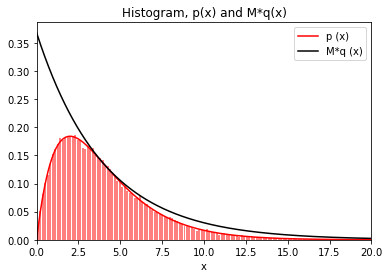

In [5]:
# Chi-square density
def p(x, nu):
    return x ** (nu / 2 - 1) * np.exp(-x / 2) / (2 ** (nu / 2) * np.math.factorial(int(nu / 2) - 1))

# M*q
def Mq(x, nu):
    lam = 1 / nu
    return (nu ** (nu / 2)) * np.exp(1 - (nu / 2)) * lam * np.exp( - lam * x) / ((2 ** (nu / 2)) * np.math.factorial(int(nu / 2) - 1))

# Sample by rejection sampler
n = 100000 # number of samples
l = 1/4 # parameters of the exponential distribution

x_accepted = np.array([]) # list to store the accepted samples

for i in range(n):
    # sample from exponential distribution with inversion
    u1 = np.random.uniform(0, 1) # sample from uniform distribution
    x = -(1/l) * np.log(1 - u1) # inverse of the CDF
    # sampling from chi-squared using rejection sampling 
    u2 = np.random.uniform(0, 1) # sample from uniform distribution
    if u2 <= p(x, 4)/ Mq(x, 4): # check if u2 is in the range of chi-squared disrtibution
        x_accepted = np.append(x_accepted, x)

# Plot histogram, p_nu(x), and M*q(x)
x = np.linspace(0, 20 , 1000)
y = p(x,4) # array of p_nu(x)
z = Mq(x,4) # array of M*q(x)

plt.plot(x, y, 'k-', color='r',label='p (x)') # p(x)
plt.plot(x, z, 'k-',label='M*q (x)') # M*q(x)
plt.hist(x_accepted, bins=200 , density=True , rwidth=0.8, color='r', alpha=0.5) # Histogram of accepted samples
plt.title("Histogram, p(x) and M*q(x)")
plt.xlabel("x") 
plt.xlim([0, 20])
plt.legend()
plt.show ()

Then calculate the acceptance rate and the theoretical acceptance rate.

In [6]:
# Calculate the acceptance rate
a = len(x_accepted) / n

# Compute the the theoretical acceptance rate
def Mopt(v):
    sol = ((v ** (v / 2)) * np.exp(1 - (v / 2))) / ((2 ** (v / 2)) * np.math.factorial(v / 2 - 1)) # Optimised function for M
    return sol

# Calculate the theoretical acceptance rate
a_hat = 1 / Mopt(4)

print(a)
print(a_hat)

0.67903
0.6795704571147613


As we can see from the results above, the acceptance rate are very close to the theoretical acceptance rate.

## Q2:  Sample From a Mixture of Chi-Squared 

In order to sample from a mixture of Chi-Squared distributions, we first sample indices from the discrete distribution using inversion method. Then adjust the method above, use rejection sampling method to sample from single Chi-Squared distribution which has nu corresponding to the indice. So that we can have a set of samples from the mixed Chi-Squared distribution. Plot the histogram and the density.

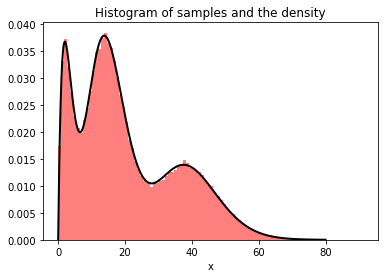

In [17]:
# Sample from a mixture of chi-squared

# Sample indices from the discrete distribution with probability w using inversion method
def discrete(s, w): 
    
    cdf_list = np.cumsum(w)
    sample_list = []

    u = np.random.uniform(0, 1)

    for i in range(len(cdf_list)):
        if cdf_list[i] > u:
            sample_list = s[i]
            break
    return sample_list

# Sample from chi-squared using rejection sampling return a single value
def sample_chi(nu):
    
    while True: # run until a single sample is accepted
        u1 = np.random.uniform(0, 1)
        x = -(nu) * np.log(1 - u1)
        u2 = np.random.uniform(0, 1)
        
        if u2 <= p(x, nu) / Mq(x, nu):
            sample = x
            break
    return sample

n = 100000 # number of samples
s = np.array([0, 1, 2]) # indices array
w = np.array([0.2, 0.5, 0.3]) # weights array
nu = np.array([4, 16, 40]) # nu array
x = np.zeros(n) # initialize the array to store the samples

# sample from chi-squared distribution of different nus with weights w
for i in range(n):
    samp = discrete(s, w) # sample from the discrete distribution with probabilities w
    x[i] = sample_chi(nu[samp]) # sample from chi-squared distribution by rejection sampling

# Density function of the mixture density
def mixture_density (x, w, nu):
    return w[0] * p(x, nu[0]) + w[1] * p(x, nu[1]) + w[2] * p(x, nu[2])

# Plot the histogram and the density 
xx = np.linspace(0, 80 , 1000)

plt.hist(x, bins=100 , density=True , rwidth=1.0, color='r', alpha=0.5) # histogram of samples
plt.plot(xx , mixture_density (xx , w, nu), color='k', linewidth=2) # density of the mixture density
plt.title("Histogram of samples and the density")
plt.xlabel("x")
plt.show()